# import

In [1]:
import pandas as pd  # データ分析ライブラリ
import numpy as np  # 数値計算ライブラリ
import scipy as sp  # 統計計算ライブラリ
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image #画像ファイル読み書き
import os
import sys
import glob

# あるディレクトリの中の条件を満たすCSVを開いて特定の操作をする

In [19]:
indir="./csvテスト"
csvlist=glob.glob(f"{indir}/flight*OFF*.csv")   
#要素1。f文字列だと変数と文字列のフォーマット文字列が簡単
#要素2。globだとワイルドカードで指定できる

for path in csvlist: #要素3。シェルスクリプトとほぼ同じ書き方   
    filename=os.path.basename(path) #要素４。import osが必要
    
    df=pd.read_csv(path) #要素５
    
    #あとはdfで具体的な操作。以下はファイル名と行数を表示する例
    print(f"{filename}:DF行数={len(df)}")


flightdata-20181215-1046-OFF-1.csv:DF行数=351
flightdata-20181215-1046-OFF-2.csv:DF行数=413
flightdata-20181215-1046-OFF-3.csv:DF行数=420
flightdata-20181215-1046-OFF-4.csv:DF行数=293
flightdata-20181215-1046-OFF-5.csv:DF行数=400
flightdata-20181215-1113-OFF-1.csv:DF行数=548
flightdata-20181215-1113-OFF-2.csv:DF行数=806
flightdata-20181215-1113-OFF-3.csv:DF行数=494
flightdata-20181216-0917-OFF-1.csv:DF行数=444
flightdata-20181216-0917-OFF-2.csv:DF行数=497
flightdata-20181216-0917-OFF-3.csv:DF行数=431
flightdata-20181216-1018-OFF-1.csv:DF行数=516
flightdata-20181216-1018-OFF-2.csv:DF行数=362
flightdata-20181216-1018-OFF-3.csv:DF行数=565
flightdata-20181216-1018-OFF-4.csv:DF行数=479
flightdata-20181216-1055-OFF-1.csv:DF行数=585
flightdata-20181216-1055-OFF-2.csv:DF行数=548
flightdata-20181216-1055-OFF-3.csv:DF行数=556
flightdata-20181216-1055-OFF-4.csv:DF行数=445


# 折れ線プロット/メッシュプロットを書く

In [137]:
class Plots:
    def figinit(self,wpix=1280,hpix=960): #デフォルトでは1280x960 のdpi100で作成する。ピクセル数は外から変更可能
        self.fig = plt.figure(figsize=(wpix/100, hpix/100), dpi=100,
                     facecolor='w', linewidth=0, edgecolor='w')
        self.ax = self.fig.add_subplot(1,1,1)
    
    def figout(self,savename): #保存名を指定できる
        self.fig.savefig(savename)
        plt.show()                
        
        

## 折れ線プロット

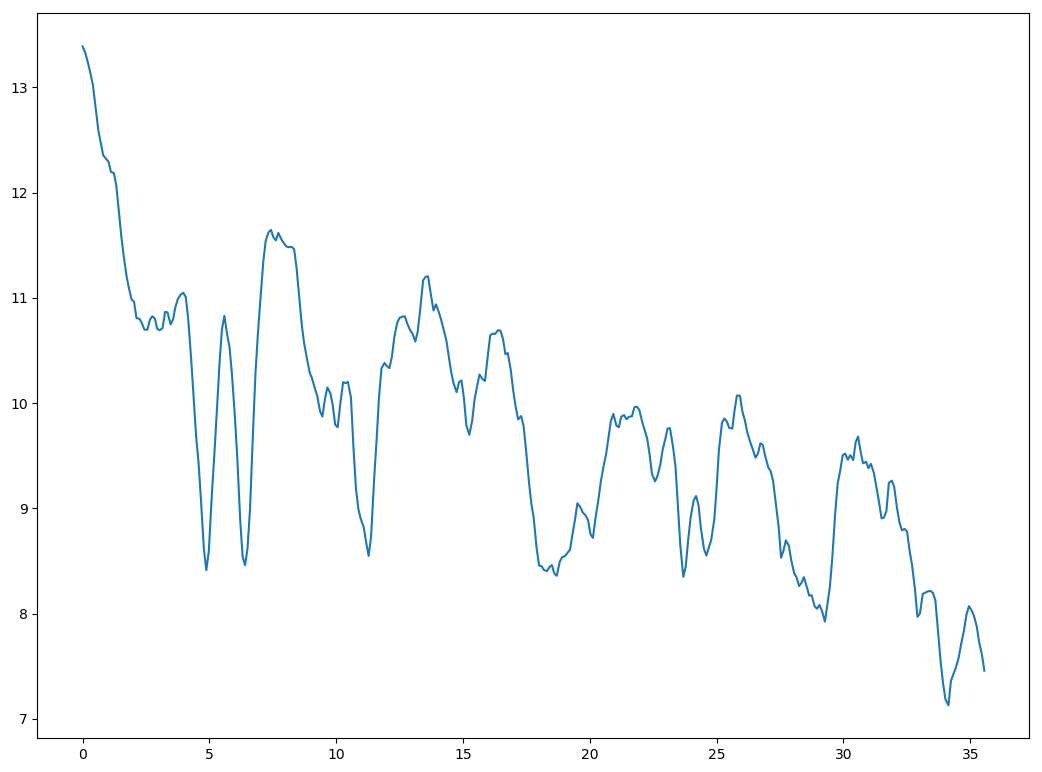

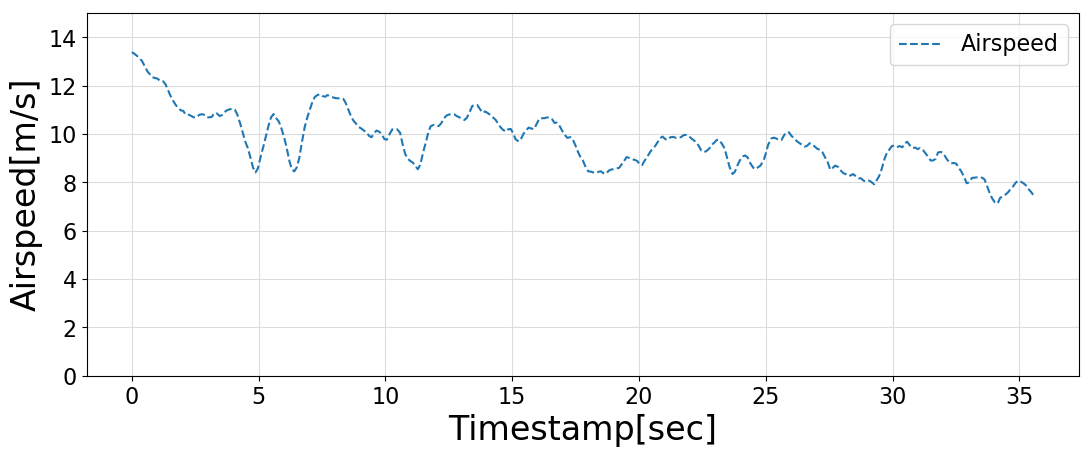

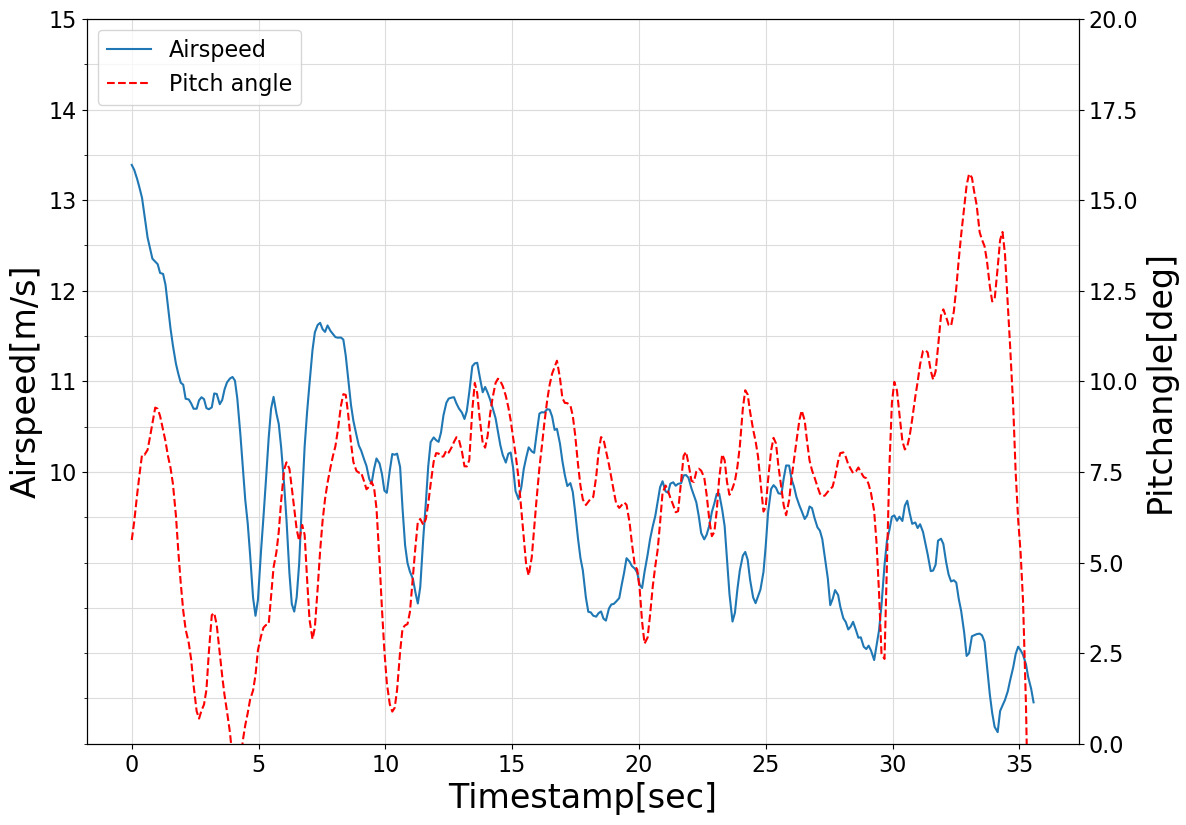

In [186]:
#csvデータ読み込んでデータフレームへ
csvname="./csvテスト/flightdata-20181215-1046-OFF-1.csv"
df = pd.read_csv(csvname)

#結果を出力するディレクトリの生成
dirname="plots"
os.makedirs(f"./{dirname}", exist_ok=True)

#プロット用のインスタンス。常に「プロット準備」「中身の設定」「出力」を一直線に行うので、複数のインスタンスを用意しなくていい
plot=Plots()

#何も設定しない、一番簡単なプロット
plot.figinit() #プロットの初期化。必ず最初に書く
plot.ax.plot("timestamp", "Airspeed[m/s]", data=df) #プロット対象の設定
plot.figout(f"{dirname}/1.png") #プロットの出力。必ず最後に書く


#色々設定してプロット
plot.figinit(1280,480) #グラフの大きさを指定しつつ初期化
plot.ax.plot("timestamp", "Airspeed[m/s]", data=df, label="Airspeed",linestyle='dashed') #プロット対象の設定＋ラベル設定＋線種設定

plot.ax.grid(color='gainsboro') #X、Y両方のグリッドを色指定しながら表示する。
plot.ax.tick_params(labelsize=16) #メモリのフォントサイズ設定
plot.ax.set_xlabel("Timestamp[sec]", fontsize=24) #X軸の名前設定
plot.ax.set_ylabel("Airspeed[m/s]", fontsize=24) #Y軸の名前設定
plot.ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=16) #凡例表示の設定
plot.ax.set_ylim([0,15])   #Y軸の表示する範囲の調整

plot.figout(f"{dirname}/2.png") #プロットの出力。


#色々設定して2軸プロット
plot.figinit() #プロットの初期化
plot.ax2 = plot.ax.twinx() #第2軸を設定。X軸は共通になる
plot.ax.plot("timestamp", "Airspeed[m/s]", data=df, label="Airspeed") #第1軸に実線プロット
plot.ax2.plot("timestamp", "Pitch angle[deg]", data=df, label="Pitch angle",linestyle='dashed',color='red') #第2軸に破線プロット

#第１軸設定
plot.ax.set_yticks(np.arange(10, 16, 1)) #メモリの表示位置を設定。メモリのない部分も設定できる。15で止めると15が表示されないので注意
plot.ax.set_yticks(np.arange(0, 16, 0.5),minor=True) #メモリを表示しないマイナーメモリの表示位置を設定。
plot.ax.set_ylim([7,15])   #Y軸の表示する範囲の調整。メモリを設定した後に設定しないとダメ
plot.ax.grid(axis='x', color='gainsboro') #X軸のグリッドを色指定しながら表示する。こっちはメインだけ
plot.ax.grid(axis='y', color='gainsboro', which='both') #Y軸のグリッドはメイン、マイナー両方表示
plot.ax.set_xlabel("Timestamp[sec]", fontsize=24) #X軸の名前設定
plot.ax.set_ylabel("Airspeed[m/s]", fontsize=24) #Y軸の名前設定
plot.ax.tick_params(labelsize=16) #メモリのフォントサイ
#第２軸設定
#Gridは１軸のみ
plot.ax2.set_ylim([0,20])   #Y軸の範囲の調整
plot.ax2.set_yticks(np.arange(0, 21, 2.5)) #メモリの表示位置を設定。
plot.ax2.set_ylabel("Pitchangle[deg]", fontsize=24) #Y軸の名前設定
plot.ax2.tick_params(labelsize=16) #メモリのフォントサイズ設定
#凡例設定。２つの軸の設定を合体するのにひと手間必要
handler1, label1 = plot.ax.get_legend_handles_labels()
handler2, label2 = plot.ax2.get_legend_handles_labels()
plot.ax.legend(handler1 + handler2, label1 + label2,
               bbox_to_anchor=(0, 1), loc='upper left', fontsize=16) #凡例表示の設定

plot.figout(f"{dirname}/3.png") #プロットの出力。


# PNG画像の一部切り出し＋サイズを調整＋JPGへ変換
（単独で実行可能）

In [43]:
inpath="./pngorg"
pngdir="smallpng"
jpgdir="smalljpg"

pnglist = os.listdir(inpath) #ディレクトリの中身全てが対象ならlistdirでもOK

#要素１。exist_ok=Trueは既にディレクトリがある場合にエラーを出さないようにする
os.makedirs(f"./{pngdir}", exist_ok=True)
os.makedirs(f"./{jpgdir}", exist_ok=True) 

for path in pnglist:
    #画像変換
    img = Image.open(f'{inpath}/{path}') #要素２。PNG画像を開く
    img = img.crop((161, 166, 954, 839)) #要素３。必要な領域の切り取り
    img = img.resize((800, 30)) #出てきた画像の大きさを変更
    
    #PNG画像出力
    img.save(f'{pngdir}/{path}') #pnglistの中身は「名前.png」なのでそのまま使える
    
    #要素４：JPG画像出力。RGBへの変換が必要らしい
    img = img.convert('RGB') #JPG用にImageモードの変換
    
    filename = os.path.splitext(path)[0] #要素５。0に名前、1に拡張子が格納されるので、0を使う
    img.save(f'{jpgdir}/{filename}.jpg')    




# 平均画像を作成
(単独で実行可能)

In [59]:
indir="./pngorg"
outdir="./png_average"

os.makedirs(f"./{outdir}", exist_ok=True)

modelist=["ON","OFF"]
for mode in modelist: #要素１ 要素文字列はmodeに入っている
    print(f"平均画像:{mode}")
    imlist = glob.glob(f"{indir}/*{mode}.png") #対象になる画像のリスト作成
    
    #要素２：画像を１回配列にして全部足し算して、画像枚数で割り算する
    w,h=Image.open(f"{imlist[0]}").size #画像リストの最初の画像で画像の大きさを取得
    N=len(imlist) #画像リストの大きさで画像枚数を取得
    print(F"横：{w},縦：{h},枚数：{N}")
    
    arr=np.zeros((h,w,4),np.float) #PNG画像の大きさに合わせた配列。ここに入れていく。RGBAなので4色分の大きさが必要
    for im in imlist: #画像ループ
        imname=(f"{im}") #開いて
        imarr=np.array(Image.open(imname),dtype=np.float) #要素2.A：配列の形状に変換して
        arr=arr+imarr/N #画像枚数で割った大きさで足し込む
    arr=np.array(np.round(arr),dtype=np.uint8) #要素2.B：画像配列は整数なのでroundで丸める
    
    #画像出力
    out=Image.fromarray(arr,mode="RGBA") #要素2.C：配列を、PNG用にRGBAモードで、画像フォーマットに変換
    out.save(f"{outdir}/Average-{mode}.png")

平均画像:ON
横：1280,縦：960,枚数：8
平均画像:OFF
横：1280,縦：960,枚数：8


# 副産物をまとめて消す！
単独で実行可能

https://note.nkmk.me/python-os-remove-rmdir-removedirs-shutil-rmtree/  
https://docs.python.org/ja/3/library/shutil.html

In [60]:
import shutil
shutil.rmtree('./smallpng', ignore_errors=True)
shutil.rmtree('./smalljpg', ignore_errors=True)
shutil.rmtree('./png_average', ignore_errors=True)
shutil.rmtree('./plots', ignore_errors=True)